# Simple Linear Regression

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model

### Import Required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  s caling
# standrd c

### Download The Dataset

 https://www.kaggle.com/datasets/sethirishabh/fuel-consumption?select=Fuel+consumption+2019.csv

In [3]:
df = pd.read_csv(r"kaggle_Fuel consumption 2019.csv")

# View the dataset
df.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


### Data Exploration
Let's first have a descriptive exploration on our data.

In [4]:
# Show the keypoints of the datasets
df.describe()

,Model-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
count,1046.0,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.108795,5.595602,12.378011,9.038050,10.872562,251.312620
std,0.0,1.315989,1.796845,3.294286,2.049742,2.697321,57.017573
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,212.250000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,248.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.575000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,522.000000


Let's select some features to explore more.

In [5]:
cdf = df[['Engine-Size','Cylinders','Fuel-Consumption-Comb','CO2-Emissions']]
cdf.head(9)

,Engine-Size,Cylinders,Fuel-Consumption-Comb,CO2-Emissions
0,2.4,4,8.6,199
1,3.5,6,10.8,252
2,3.5,6,11.0,258
3,3.0,6,9.0,210
4,3.5,6,11.0,261
5,2.0,4,9.9,232
6,2.0,4,10.3,242
7,3.5,6,8.4,196
8,2.4,4,8.7,205


Plot each of these features:

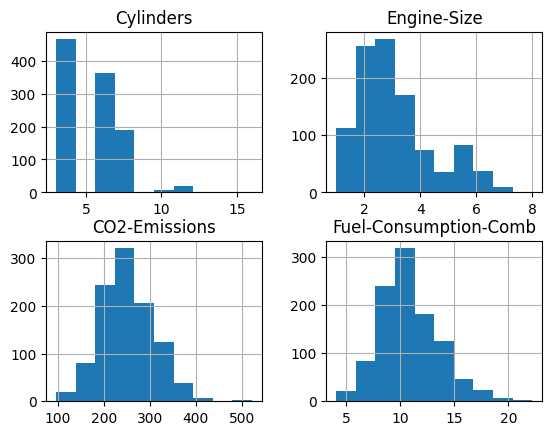

In [6]:
viz = cdf[['Cylinders','Engine-Size','CO2-Emissions','Fuel-Consumption-Comb']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

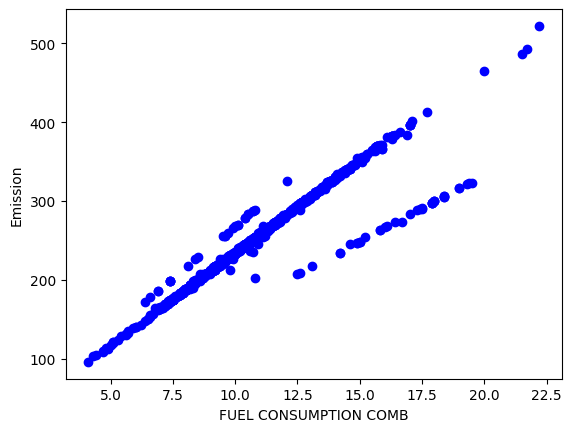

In [7]:
plt.scatter(data=cdf, x='Fuel-Consumption-Comb', y='CO2-Emissions',  color='blue')
plt.xlabel("FUEL CONSUMPTION COMB")
plt.ylabel("Emission")
plt.show()

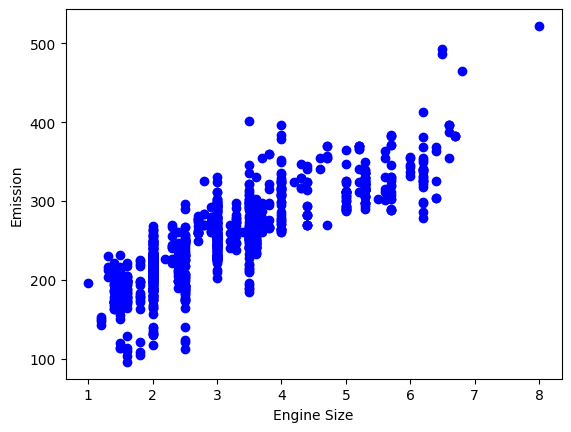

In [8]:
plt.scatter(cdf["Engine-Size"], cdf["CO2-Emissions"], color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

## Try with yourself 
plot __Cylinder__ vs __Emission__, to explore how linear is their relationship is:

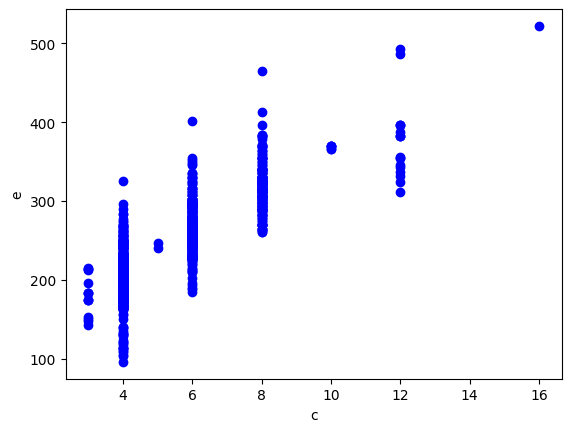

In [9]:
# write your code here


plt.scatter(data=cdf, x='Cylinders', y='CO2-Emissions',  color='blue')
plt.xlabel("c")
plt.ylabel("e")
plt.show()

#### Creating train and test dataset


In [10]:
mask = np.random.rand(len(df)) < 0.85
train = cdf[mask]
print(train)
test = cdf[~mask]
print(test)

      Engine-Size  Cylinders  Fuel-Consumption-Comb  CO2-Emissions
0             2.4          4                    8.6            199
1             3.5          6                   10.8            252
2             3.5          6                   11.0            258
3             3.0          6                    9.0            210
4             3.5          6                   11.0            261
...           ...        ...                    ...            ...
1041          2.0          4                    9.0            211
1042          2.0          4                   10.0            233
1043          2.0          4                   10.4            242
1044          2.0          4                   10.0            233
1045          2.0          4                   10.7            250

[894 rows x 4 columns]
      Engine-Size  Cylinders  Fuel-Consumption-Comb  CO2-Emissions
7             3.5          6                    8.4            196
14            2.0          4          

In [11]:

train.describe()

,Engine-Size,Cylinders,Fuel-Consumption-Comb,CO2-Emissions
count,894.000000,894.000000,894.000000,894.000000
mean,3.090492,5.576063,10.879418,251.705817
std,1.302298,1.796577,2.655831,56.319673
min,1.000000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,9.100000,213.000000
50%,3.000000,6.000000,10.600000,248.000000
75%,3.600000,6.000000,12.500000,287.750000
max,8.000000,16.000000,22.200000,522.000000


In [12]:
test.describe()

,Engine-Size,Cylinders,Fuel-Consumption-Comb,CO2-Emissions
count,152.000000,152.000000,152.000000,152.000000
mean,3.216447,5.710526,10.832237,249.000000
std,1.393430,1.800043,2.938590,61.106573
min,1.200000,3.000000,4.900000,113.000000
25%,2.000000,4.000000,8.700000,204.750000
50%,3.000000,6.000000,10.600000,248.000000
75%,3.850000,6.000000,12.700000,296.250000
max,6.600000,12.000000,19.000000,397.000000


### Simple Regression Model
minimize the 'residual sum of squares' between

Train data distrubtion

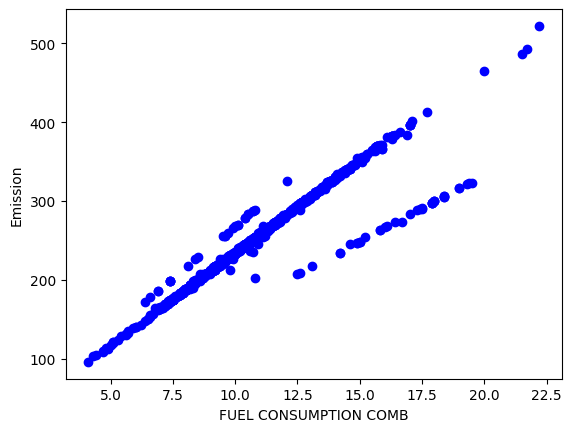

In [13]:
plt.scatter(data=cdf, x='Fuel-Consumption-Comb', y='CO2-Emissions',  color='blue')
plt.xlabel("FUEL CONSUMPTION COMB")
plt.ylabel("Emission")
plt.show()

### Modeling
Using Sklearn package to model data.

In [14]:
from sklearn import linear_model
model = linear_model.LinearRegression()
train_X = train[["Engine-Size"]].to_numpy()
train_y = train[["CO2-Emissions"]].to_numpy()
print(train_X.shape)
print(train_y.shape)

model.fit(train_X,train_y)
# The coefficients
print("Coefficients:", model.coef_)
print("Intercept: ",model.intercept_)

(894, 1)
(894, 1)
Coefficients: [[36.44104641]]
Intercept:  [139.08504796]


In [15]:
train[["Engine-Size"]]

,Engine-Size
0,2.4
1,3.5
2,3.5
3,3.0
4,3.5
...,...
1041,2.0
1042,2.0
1043,2.0
1044,2.0


#### Visaulize (plot) The output
our fit line over the data

Text(0, 0.5, 'Emission')

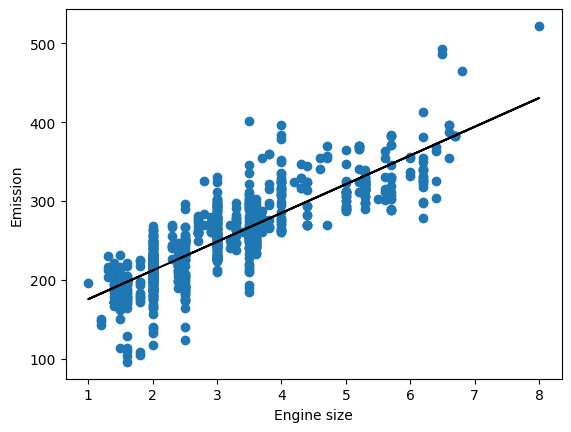

In [16]:
plt.scatter(data=train,x="Engine-Size",y='CO2-Emissions') #color ='blue'
plt.plot(train_X, model.coef_[0][0]*train_X+model.intercept_[0],'-k') 
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation metrics
Root Mean Square Error RMSE \
Mean Absloute Error MAE \
R-squared R2score

In [17]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score
test_X = test[["Engine-Size"]].to_numpy()
test_y = test[["CO2-Emissions"]].to_numpy()
test_pred = model.predict(test_X)
print("MAE: %.3f" %mean_absolute_error(test_pred,test_y))
print("RMSE: %.3f" %root_mean_squared_error(test_pred,test_y))
print("R2-score: %.3f" %r2_score(test_pred,test_y))



MAE: 25.284
RMSE: 33.943
R2-score: 0.550


## Try with yourself
try 'Fuel-Consumption-Comb' feature instead of 'Engine

In [18]:
model = linear_model.LinearRegression()
train_X = train[["Fuel-Consumption-Comb"]].to_numpy()
train_y = train[["CO2-Emissions"]].to_numpy()
print(train_X.shape)
print(train_y.shape)

model.fit(train_X,train_y)
print("Coefficients:", model.coef_)
print("Intercept: ",model.intercept_) #0x+b
model.predict(train_X)

(894, 1)
(894, 1)
Coefficients: [[19.89619497]]
Intercept:  [35.24678797]


array([[206.35406474],
       [250.12569369],
       [254.10493268],
       [214.31254273],
       [254.10493268],
       [232.21911821],
       [240.1775962 ],
       [208.34368424],
       [212.32292324],
       [230.22949871],
       [240.1775962 ],
       [202.37482575],
       [202.37482575],
       [272.01150816],
       [220.28140123],
       [226.25025972],
       [264.05303017],
       [299.86618112],
       [309.81427861],
       [315.7831371 ],
       [258.08417168],
       [196.40596726],
       [226.25025972],
       [224.26064022],
       [190.43710876],
       [224.26064022],
       [208.34368424],
       [208.34368424],
       [226.25025972],
       [226.25025972],
       [246.14645469],
       [232.21911821],
       [254.10493268],
       [246.14645469],
       [260.07379117],
       [264.05303017],
       [230.22949871],
       [230.22949871],
       [232.21911821],
       [230.22949871],
       [264.05303017],
       [218.29178173],
       [218.29178173],
       [240

Text(0, 0.5, 'Emission')

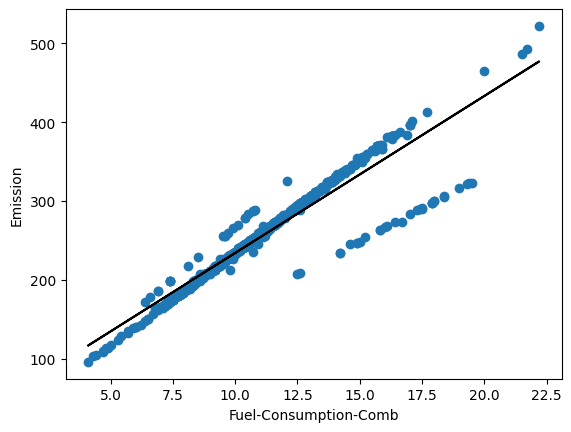

In [19]:
plt.scatter(data=train,x="Fuel-Consumption-Comb",y='CO2-Emissions') #color ='blue'
plt.plot(train_X, model.coef_[0][0]*train_X+model.intercept_[0],'-k') 
plt.xlabel("Fuel-Consumption-Comb")
plt.ylabel("Emission")

In [20]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score
test_X = test[["Fuel-Consumption-Comb"]].to_numpy()
test_y = test[["CO2-Emissions"]].to_numpy()
test_pred = model.predict(test_X)
print("MAE: %.3f" %mean_absolute_error(test_pred,test_y))
print("RMSE: %.3f" %root_mean_squared_error(test_pred,test_y))
print("R2-score: %.3f" %r2_score(test_pred,test_y))

MAE: 12.855
RMSE: 22.775
R2-score: 0.847


Mean Squared Error: 1035.67


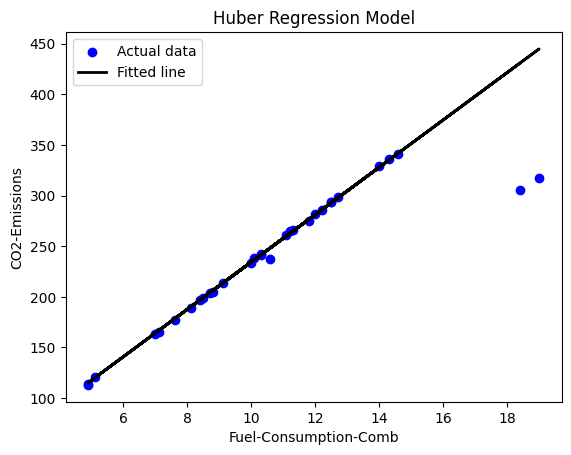

In [21]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# فرض أن 'X' و 'y' هما بيانات المدخلات والاستجابة
X = test[['Fuel-Consumption-Comb']].to_numpy()
y = test[['CO2-Emissions']].to_numpy()

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج HuberRegressor
huber = HuberRegressor()
huber.fit(X_train, y_train.ravel())  # استخدام ravel() لتحويل y_train إلى شكل مناسب

# التنبؤ بالقيم على البيانات الاختبارية
y_pred = huber.predict(X_test)

# حساب الخطأ المربع الوسطي لتقييم النموذج
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# مخطط لإظهار النموذج
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Fitted line')
plt.xlabel('Fuel-Consumption-Comb')
plt.ylabel('CO2-Emissions')
plt.title('Huber Regression Model')
plt.legend()
plt.show()


#### Add metrics of performance

### Thank you for completing this lab!


## Author
Abdelrhman Yahia
